In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
#### Paths to data tables ####

## Health outcomes ##

# Life expectancy
life_expectancy = "Resources/life_expectancy.csv"

# Avoidable mortality
avoidable_mortality = "Resources/avoidable_mortality.csv"

# Heart disease
heart_disease_mortality = "Resources/heart_disease_mortality.csv"

# Infant mortality 
infant_mortality = "Resources/infant_mortality.csv"

# Maternal mortality
maternal_mortality = "Resources/maternal_mortality.csv"


## Financial data ##

# Health expenditure and financing
expenditure_financing = "Resources/expenditure_financing.csv"

# Health expenditure from 2015
expenditure_2015 = "Resources/expenditure_financing_2015.csv"

# Percent insured
percent_insured = "Resources/percent_insured.csv"

# Percentage GDP
percent_gdp = "Resources/percent_gdp.csv"

# Health expenditure by function from 2015
function = "Resources/function.csv"

In [12]:
life_expectancy_file = pd.read_csv(life_expectancy)
avoidable_mortality_file = pd.read_csv(avoidable_mortality)
infant_mortality_file = pd.read_csv(infant_mortality)
maternal_mortality_file = pd.read_csv(maternal_mortality)
heart_disease_mortality_file = pd.read_csv(heart_disease_mortality)
expenditure_financing_file = pd.read_csv(expenditure_financing)
expenditure_2015_file = pd.read_csv(expenditure_2015)
percent_insured_file = pd.read_csv(percent_insured)
percent_gdp_file = pd.read_csv(percent_gdp)
function_file = pd.read_csv(function)

In [20]:
# Life expectancy 

life_expectancy_file = life_expectancy_file[["Country", "Year", "Value"]]
life_expectancy_df = life_expectancy_file.rename(columns = {"Value": "Life Expectancy (Years)"})

# Avoidable mortality
avoidable_mortality_file = avoidable_mortality_file[["Country", "Year", "Value"]]
avoidable_mortality_df = avoidable_mortality_file.rename(columns = {"Value": "Avoidable Deaths Per 100,000 Population"})

# Infant mortality 
infant_mortality_file = infant_mortality_file[["Country", "Year", "Value"]]
infant_mortality_df = infant_mortality_file.rename(columns = {"Value": "Infant Mortality (Deaths per 1,000 Live Births)"})

# Maternal mortality
maternal_mortality_file = maternal_mortality_file[["Country", "Year", "Value"]]
maternal_mortality_df = maternal_mortality_file.rename(columns = {"Value": "Maternal Mortality (Deaths per 100,000 Live Births)"})

# Heart disease mortality
heart_disease_mortality_file = heart_disease_mortality_file[["Country", "Year", "Value"]]
heart_disease_mortality_df = heart_disease_mortality_file.rename(columns = {"Value": "Death from Heart Disease per 100,000 Population"})

# Percent GDP spent on health over 20 years
percent_gdp_file = percent_gdp_file[["Country", "Year", "Value"]]
percent_gdp_df = percent_gdp_file.rename(columns = {"Value": "Percent of GDP Spent on Health Care"})

# Health expenditure per capita from 2018
expenditure_financing_file = expenditure_financing_file[["Country", "Year", "Value"]]
expenditure_financing_df = expenditure_financing_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Health expenditure from 2015
expenditure_2015_file = expenditure_2015_file[["Country", "Year", "Value"]]
expenditure_2015_df = expenditure_2015_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Percent of population insured
percent_insured_file = percent_insured_file[["Country", "Year", "Value"]]
percent_insured_df = percent_insured_file.rename(columns = {"Value": "Total Percent of Population with Health Insurance"})

function_file

# Government schemes, compulsory schemes, and voluntary schemes
function_file = function_file[["Country", "Year", "Function", "Value"]]
function_df = function_file.rename(columns={"Value": "Percent of Total Health Expenditure"})

In [21]:
merge1 = pd.merge(life_expectancy_df, avoidable_mortality_df, on=["Country", "Year"], how='outer')
merge2 = pd.merge(merge1, infant_mortality_df, on=["Country", "Year"], how='outer')
merge3 = pd.merge(merge2, maternal_mortality_df, on=["Country", "Year"], how='outer')
merge4 = pd.merge(merge3, heart_disease_mortality_df, on=["Country", "Year"], how='outer')
merge5 = pd.merge(merge4, expenditure_financing_df, on=["Country", "Year"], how='outer')
merge6 = pd.merge(merge5, percent_insured_df, on=["Country", "Year"], how='outer')

# Rename main table
health_spending = merge6

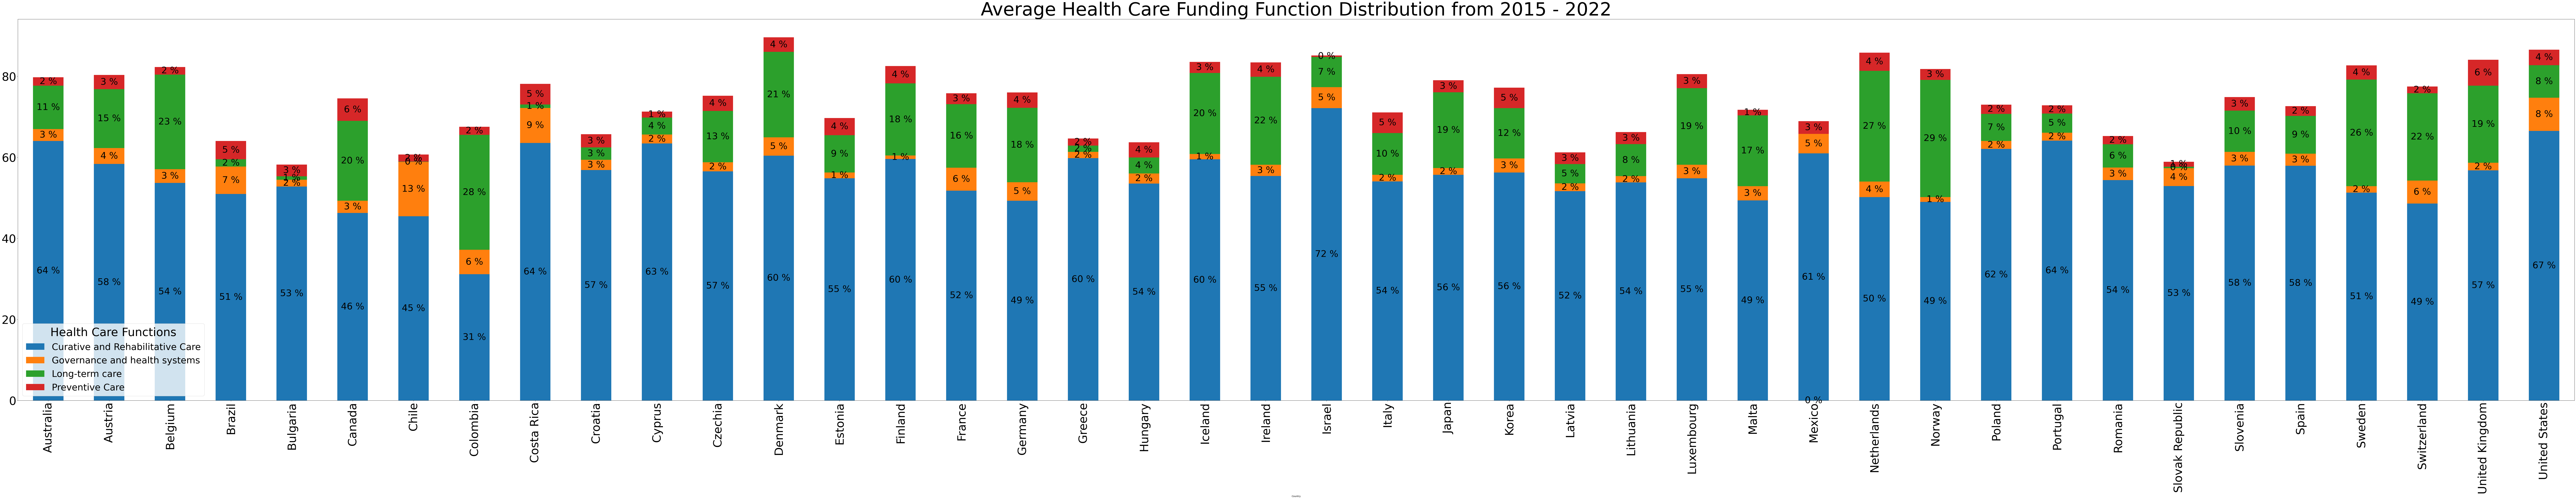

In [27]:
#### Create a barchart with all countries average expenditure per health care function 2015-2022 

# Get rid of year column because we're taking an average
function_df = function_df[["Country", "Function", "Percent of Total Health Expenditure"]]

# Unstack Financing schemes so we can make a stacked bar chart
function_grouped = function_df.groupby(["Country", "Function"]).mean()
function_unstacked = function_grouped.unstack("Function")

# Create the bar chart
legend_labels = ["Curative and Rehabilitative Care", "Governance and health systems", "Long-term care", "Preventive Care"]
function_chart = function_unstacked.plot(kind="bar", stacked=True, figsize = (200, 30))
function_chart.tick_params(axis='x', labelsize=50)
function_chart.tick_params(axis='y', labelsize=50)
function_chart.set_title("Average Health Care Funding Function Distribution from 2015 - 2022", fontsize=80)
function_chart.legend(legend_labels, title="Health Care Functions", title_fontsize=50, fontsize=40, loc="lower left")

# Annotate the distributions with the value 
# Got this code from https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in function_chart.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    function_chart.text(x+width/2,
                       y+height/2,
                       '{:.0f} %'.format(height),
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=40)

In [24]:
expenditure_2015_average = expenditure_2015_df.groupby(["Country"]).mean()
expenditure_2015_average.head()
top_10 = expenditure_2015_average.nlargest(10, "Health Expenditure Per Capita, Current Prices, Current PPP")
top_10

,Year,"Health Expenditure Per Capita, Current Prices, Current PPP"
Country,,
United States,2018.5,10887.087125
Switzerland,2018.5,6911.156625
Norway,2018.5,6529.043250
Germany,2018.5,6516.588500
Austria,2018.5,5803.436750
Netherlands,2018.5,5757.967750
Sweden,2018.5,5569.620250
Canada,2018.5,5485.508875
Belgium,2018.5,5485.091875


In [30]:
## Print top 10 countries scheme distribution

ten_functions = function_df[(function_df["Country"] == "United States") |
                             (function_df["Country"] == "Switzerland") |
                             (function_df["Country"] == "Norway") |
                             (function_df["Country"] == "Germany") |
                             (function_df["Country"] == "Austria") |
                             (function_df["Country"] == "Netherlands") |
                             (function_df["Country"] == "Sweden") |
                             (function_df["Country"] == "Canada") |
                             (function_df["Country"] == "Belgium") |
                             (function_df["Country"] == "Denmark")
                             ]

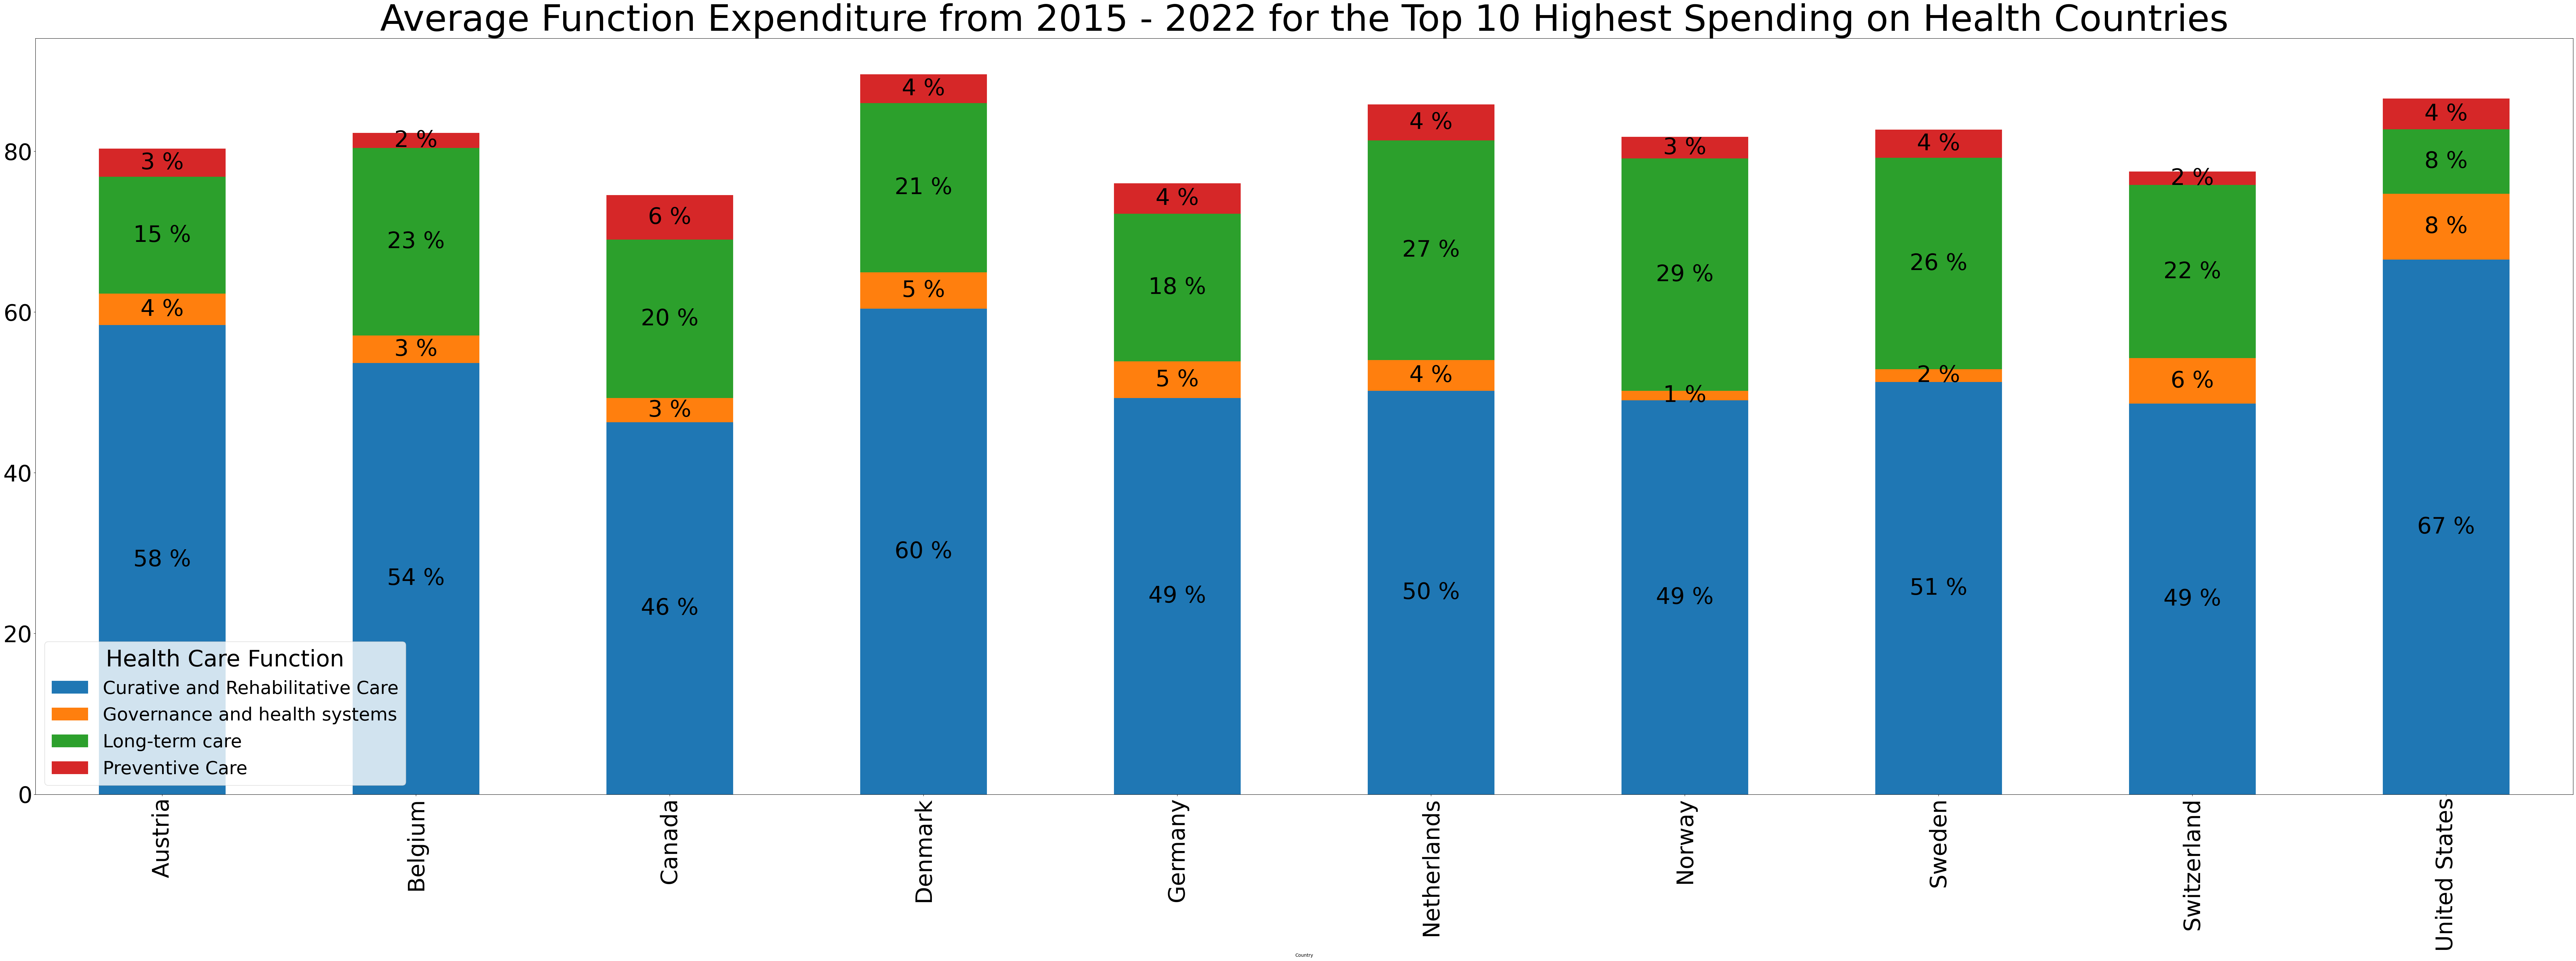

In [32]:
## Make a chart with top ten countries scheme distribution

# Get rid of year column because we're taking an average
ten_functions_chart = ten_functions[["Country", "Function", "Percent of Total Health Expenditure"]]

# Group and unstack Financing schemes so we can make a stacked bar chart
ten_functions_grouped = ten_functions_chart.groupby(["Country", "Function"]).mean()
ten_functions_unstacked = ten_functions_grouped.unstack("Function")

# Create the bar chart
legend_labels = ["Curative and Rehabilitative Care", "Governance and health systems", "Long-term care", "Preventive Care"]
ten_functions_chart = ten_functions_unstacked.plot(kind="bar", stacked=True, figsize = (100, 30))
ten_functions_chart.tick_params(axis='x', labelsize=50)
ten_functions_chart.tick_params(axis='y', labelsize=50)
ten_functions_chart.set_title("Average Function Expenditure from 2015 - 2022 for the Top 10 Highest Spending on Health Countries", fontsize=80)
ten_functions_chart.legend(legend_labels, title="Health Care Function", title_fontsize=50, fontsize=40, loc="lower left")

# Annotate the distributions with the value 
# Got this code from https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ten_functions_chart.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ten_functions_chart.text(x+width/2,
                       y+height/2,
                       '{:.0f} %'.format(height),
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=50)

In [33]:
# Take the mean of each health outcome measure across the main outcomes table
health_spending_avg = health_spending.groupby("Country").mean()
health_spending_avg.head()

,Year,Life Expectancy (Years),"Avoidable Deaths Per 100,000 Population","Infant Mortality (Deaths per 1,000 Live Births)","Maternal Mortality (Deaths per 100,000 Live Births)","Death from Heart Disease per 100,000 Population","Health Expenditure Per Capita, Current Prices, Current PPP",Total Percent of Population with Health Insurance
Country,,,,,,,,
Argentina,2019.5,76.750,296.666667,7.225,NaN,315.966667,2241.172000,NaN
Australia,2019.5,83.025,148.750000,3.225,3.550,168.850000,5558.869000,100.000
Austria,2019.5,81.600,190.000000,2.850,4.725,294.775000,5924.434250,99.900
Belgium,2019.5,81.625,178.000000,3.425,7.600,200.000000,5576.489250,98.625
Brazil,2019.5,74.800,351.000000,12.775,NaN,319.100000,1502.630333,NaN


In [36]:
### Merge average financing scheme table with main health spending v outcomes table
functions_health_merged = pd.merge(function_grouped, health_spending_avg, left_index=True, right_index=True, how='outer')

# Reset index so I can access the financing scheme column for a scatter plot
functions_health_merged.reset_index(inplace=True)
functions_health_merged.head()

,Country,Function,Percent of Total Health Expenditure,Year,Life Expectancy (Years),"Avoidable Deaths Per 100,000 Population","Infant Mortality (Deaths per 1,000 Live Births)","Maternal Mortality (Deaths per 100,000 Live Births)","Death from Heart Disease per 100,000 Population","Health Expenditure Per Capita, Current Prices, Current PPP",Total Percent of Population with Health Insurance
0,Australia,Curative and rehabilitative care,64.026000,2019.5,83.025,148.75,3.225,3.550,168.850,5558.86900,100.0
1,Australia,Governance and health system and financing adm...,2.943333,2019.5,83.025,148.75,3.225,3.550,168.850,5558.86900,100.0
2,Australia,Long-term care (health),10.711500,2019.5,83.025,148.75,3.225,3.550,168.850,5558.86900,100.0
3,Australia,Preventive care,2.065833,2019.5,83.025,148.75,3.225,3.550,168.850,5558.86900,100.0
4,Austria,Curative and rehabilitative care,58.355714,2019.5,81.600,190.00,2.850,4.725,294.775,5924.43425,99.9


In [37]:
#### Define repeating variables for scatter plots

# Define x axis variables
curative = functions_health_merged[functions_health_merged['Function'] 
                            == "Curative and rehabilitative care"]["Percent of Total Health Expenditure"]
governance = functions_health_merged[functions_health_merged['Function'] 
                            == "Governance and health systems and financing administration"]["Percent of Total Health Expenditure"]
long_term = functions_health_merged[functions_health_merged['Function']
                            == "Long-term care"]["Percent of Total Health Expenditure"]
preventive = functions_health_merged[functions_health_merged['Function']
                            == "Prevantive care"]["Percent of Total Health Expenditure"]

# Identify the United States on the scatter plot
curative_country_name = functions_health_merged.loc[functions_health_merged["Function"]
                                             == "Curative and rehabilitative care"]["Country"]
governance_country_name = functions_health_merged.loc[functions_health_merged["Function"]
                                             == "Governance and health systems and financing administration"]["Country"]
long_term_country_name = functions_health_merged.loc[functions_health_merged["Function"]
                                             == "Long-term care"]["Country"]
prevative_country_name = functions_health_merged.loc[functions_health_merged["Function"]
                                             == "Preventive care"]["Country"]

In [ ]:
### Financing scheme v life expectancy plot

# Define y axis variables
y_curative = functions_health_merged.loc[functions_health_merged["Function"] 
                                     == "Government schemes","Life Expectancy (Years)"]
y_governance = functions_health_merged.loc[functions_health_merged["Function"] 
                                     == "Compulsory contributory health insurance schemes","Life Expectancy (Years)"]
y_long_term = functions_health_merged.loc[functions_health_merged["Function"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Life Expectancy (Years)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Life Expectancy (Years)")
    ax.set_title(title)

plt.suptitle("Life Expectancy by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

# Name chart for future use
scheme_life_chart = plt.gcf()